# Logistic Regression

## 必要なモジュールを読み込む

In [20]:
#モジュールの読み込み
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#seabornのスタイルを適用
sns.set()
sns.set_style('whitegrid')

# seaborn.set_style(style=None, rc=None)
# プリセットのstyleは5つ。
# darkgrid：背景暗、グリッドあり。デフォルト。
# dark：背景暗、グリッドなし。
# whitegrid：背景白、グリッドあり。
# white：背景白、グリッドなし。
# ticks：背景白、軸にのみグリッドあり

## サンプルデータの作成

In [21]:
sample = 500
harf_sample = 250
var = .3

def gen_data(sample, harf_sample):
    x0 = np.random.normal(size=sample).reshape(-1, 2) - 1.
    x1 = np.random.normal(size=sample).reshape(-1, 2) + 1.
    x_train = np.concatenate([x0, x1])
    y_train = np.concatenate([np.zeros(harf_sample), np.ones(harf_sample)]).astype(np.int)
    return x_train, y_train

def plt_data(x_train, y_train):
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.legend()


# x, y	グラフに出力するデータ
# s	サイズ (デフォルト値: 20)
# c	色、または、連続した色の値
# marker	マーカーの形 (デフォルト値: ‘o’= 円)
# cmap	カラーマップ。c が float 型の場合のみ利用可能です。
# norm	c を float 型の配列を指定した場合のみ有効。正規化を行う場合の Normalize インスタンスを指定。
# vmin, vmax	正規化時の最大、最小値。 指定しない場合、データの最大・最小値となります。norm にインスタンスを指定した場合、vmin, vmax の指定は無視されます。
# alpha	透明度。0(透明)～1(不透明)の間の数値を指定。
# linewidths	線の太さ。
# edgecolors	線の色。

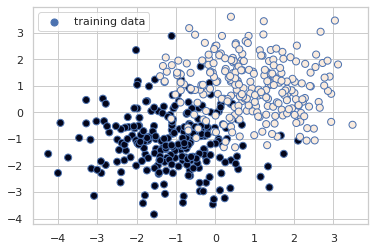

In [22]:
#データ作成
x_train, y_train = gen_data(sample, harf_sample)
#データ表示
plt_data(x_train, y_train)

In [23]:
# 関数の定義
def add_one(x):
    return np.concatenate([np.ones(len(x))[:, None], x], axis=1)

In [24]:
# シグモイド関数の定義
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 勾配降下法の関数定義
def sgd(X_train, max_iter, lr):
    w = np.zeros(X_train.shape[1])
    for _ in range(max_iter):
        w_prev = np.copy(w)
        sigma = sigmoid(np.dot(X_train, w))
        grad = np.dot(X_train.T, (sigma - y_train))
        w -= lr * grad
        # np.allclose() 完全一致：True、不一致：False
        if np.allclose(w, w_prev):
            return w
    return w

X_train = add_one(x_train)
max_iter=300
lr = 0.002
w = sgd(X_train, max_iter, lr)

## 予測

In [25]:
# np.linspace第一引数startに最初の値、第二引数stopに最後の値、第三引数numに要素数を指定
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

In [26]:
X_test = add_one(xx)
proba = sigmoid(np.dot(X_test, w))
y_pred = (proba > 0.5).astype(np.int)

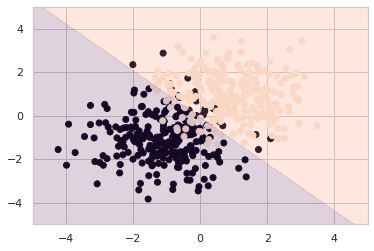

In [27]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(xx0, xx1, proba.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))

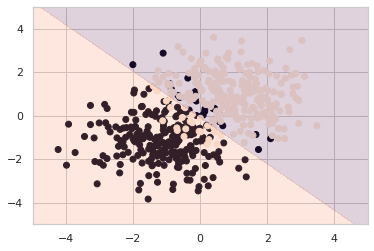

In [28]:
#sklearnで実装

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(fit_intercept=True)
model.fit(x_train, y_train)
proba = model.predict_proba(xx)
y_pred = (proba > 0.5).astype(np.int)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(xx0, xx1, proba[:, 0].reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))